## Q1
For this question we used Newton's equations:
$$ \dot{\mathbf{r}} = \mathbf{v} $$
$$ \dot{\mathbf{v}} = \frac{\mathbf{F}(\mathbf{r})}{m} = \mathbf{a} $$

coupled with Verlet algorithm:
$$ \mathbf{r}_{k+1} = \mathbf{r}_{k} + \mathbf{v}_{k}dt + \frac{1}{2}\mathbf{a}_kdt^2 $$

$$ \mathbf{a}_{k+1} = \frac{\mathbf{F}(\mathbf{r}_{k+1})}{m}. $$

From there we simply chose a length of time t and plotted the graph of the orbit.

In [1]:
G=6.67408e-11
mass_sun=1.989e30
R=149.59787e9


ax_initial=-(G*mass_sun)/R**2
ay_initial=0
ax_initial

-0.005931648003795993

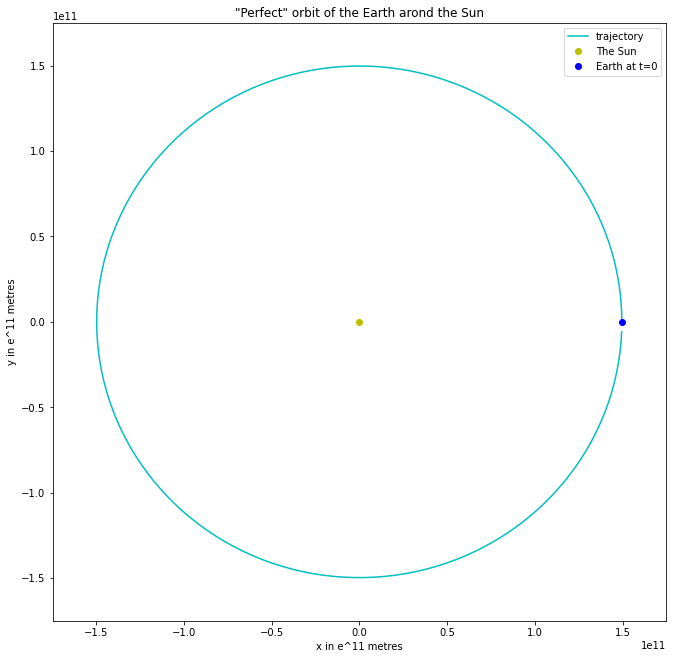

In [2]:
import numpy as np
import matplotlib.pyplot as plt

G=6.67408e-11
mass_sun=1.989e30
R=149.59787e9


tmax=3.154e7
dt=100000
N = int(tmax/dt)


t = np.zeros((N,))
r = np.zeros((2,N))
v = np.zeros((2,N))
a = np.zeros((2,N))

r[0,0]=R

r[1,0]=0
v[0,0]=0
v[1,0]=29800

a[0,0]=-(G*mass_sun)/R**2
a[1,0]=0

for n in range(0,N-1):
    t[n+1] = t[n] + dt
    r[:,n+1]=r[:,n] + ( v[:,n]*(dt)) + (0.5*(a[:,n])* ((dt)**2))
    a[:,n+1]=((-1*G*mass_sun)/(np.sqrt((r[0,n+1])**2+(r[1,n+1])**2)**3)*r[:,n+1])
    v[:,n+1]=v[:,n]+0.5*(a[:,n+1]+a[:,n])*(dt)
    
plt.figure(figsize=(11,11))

plt.plot(r[0,:],r[1,:],'c',label='trajectory')

plt.plot(0,'yo',lw=2,label='The Sun')
plt.plot(R,0,'bo',lw=2,label='Earth at t=0')

plt.xlabel('x in e^11 metres')
plt.ylabel('y in e^11 metres')
plt.legend()
plt.title('"Perfect" orbit of the Earth arond the Sun')
plt.xlim(-175e9,175e9)
plt.ylim(-175e9,175e9)
plt.show()



## Q2

Position of Sun is (0,0) and Earth's position is given by $ \mathbf{r} = (\rho cos\theta,\rho sin\theta)$.
Then $\dot{\mathbf{r}}$ in cylindrical polar coordinates is given by;

$\dot{\textbf{r}} = (\dot{\rho}cos\theta - \rho sin\theta , \dot{\rho}sin\theta + \rho cos\theta).$

Thus, the lagrangian is $$L = T - U = \frac{1}{2} m \dot{\rho}^2 + \frac{1}{2}m\rho^2\dot{\theta}^2 - U(\rho,\theta)$$
where $U(\rho,\theta) = U(\rho)$ is independent of $\theta$, and $$U(\rho) = G \frac{Mm}{\rho^2}.$$

Now, the momenta are given by;
$$ p_\rho = \frac{ \partial L}{\partial \dot{\rho}}  = m\dot{\rho} $$ so,
$$ \dot{\rho} = \frac{p_\rho}{m}. $$

And similarly for $\theta$;

$$ p_\theta = \frac{\partial L}{\partial \dot{\theta}} = m \rho^2 \dot{\theta}$$
meaning,
$$ \dot{\theta} = \frac{p_\theta}{m\rho^2}. (1)$$


Also, the total energy of our system is conserved and given by;

$$E = \frac{ 1}{ 2 }m (\dot{\rho}^2 + \dot{\theta}^2\rho^2 ) - \frac{GMm}{\rho}.$$

Substituting equation $(1)$ in the equation for energy, and assuming that the equation above describes the energy of a fictitious particle in one dimension, with effective potential

$$ U_{eff}(\rho) = \frac{p_\theta^2}{ 2m \rho^2 } - \frac{GMm}{\rho}.$$

For a circular orbit, $U_{eff}$ must be minimal; let $ r_{*} $ be the equilibrium so:

$$ \frac{\partial U_{eff}}{\partial \rho}(r_*) = 0  $$ so
$$ - \frac{P_\theta^2}{mr_{*}^3} + \frac{GMm}{r_{*}^2}=0 $$
or $$ P_\theta^2 = GMm^2 r_{*}.$$

This gives;

$$\dot{\theta} = \sqrt{\frac{GMmr_*}{r_*^4}} = \sqrt{GMr_*^{-3}}$$

and hence,

$$v_0 = \dot{\theta}R = 1.99\times 10^{-7} \times 149.59787 \times 10^9 = 29.8 km/s (3sf).$$


where $r_* = R $

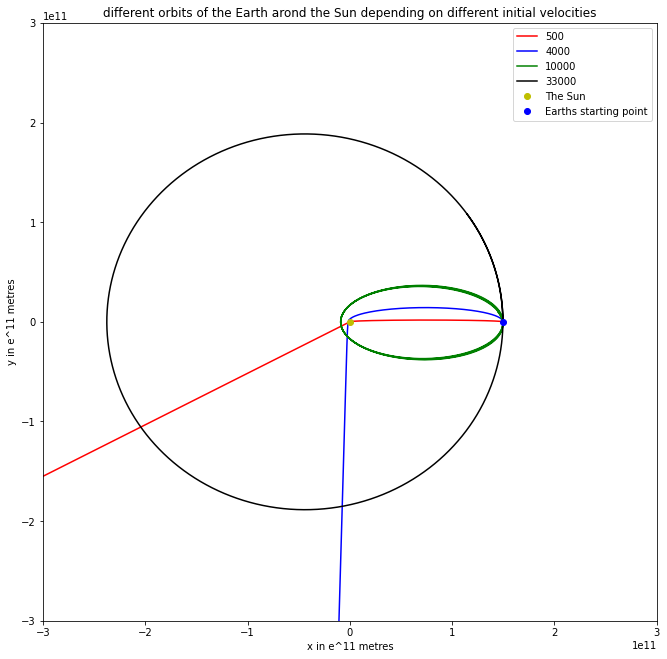

In [3]:
G=6.67408e-11
mass_sun=1.989e30
R=149.59787e9

tmax=5e7
dt=10000

N = int(tmax/dt)
t = np.zeros((N,))
r = np.zeros((2,N))
v = np.zeros((2,N))
a = np.zeros((2,N))

r[0,0]=R

r[1,0]=0
v[0,0]=0

a[0,0]=-(G*mass_sun)/R**2
a[1,0]=0

varied_v=[500,4000,10000,33000]
plotcols = ['r','b','g','k']
plt.figure(figsize=(11,11))
for k in range(len(varied_v)):
    v[1,0]=varied_v[k]
    
    for n in range(0,N-1):
        t[n+1] = t[n] + dt
        r[:,n+1]=r[:,n] + ( v[:,n]*(dt)) + (0.5*(a[:,n])* ((dt)**2))
        a[:,n+1]=( (-1*G*mass_sun) / (np.sqrt((r[0,n+1])**2+(r[1,n+1])**2)**3) * r[:,n+1])
        v[:,n+1]=v[:,n]+0.5*(a[:,n+1]+a[:,n])*(dt)
    
    plt.plot(r[0,:],r[1,:],'-',color=plotcols[k],label=str(varied_v[k]))
    
plt.plot(0,'yo',lw=2,label='The Sun')
plt.plot(R,0,'bo',lw=2,label='Earths starting point')
plt.xlabel('x in e^11 metres')
plt.ylabel('y in e^11 metres')
plt.legend()
plt.title('different orbits of the Earth arond the Sun depending on different initial velocities')
plt.xlim(-300e9,300e9)
plt.ylim(-300e9,300e9)
plt.show()



## Q4
For this question, we have tested Kepler's Law as seen below. We used that:

\begin{equation}
\mathbf{r} \times \mathbf{\dot{v}} = \mathbf{r} \times \mathbf{\ddot{r}} = \mathbf{r} \times (\frac{-Gm_j}{R^3}\mathbf{r}) = \mathbf{0}.
\end{equation}

We also used:
\begin{equation}
\mathbf{\dot{r}} \times \mathbf{v} = \mathbf{v} \times \mathbf{v} = \mathbf{0}.
\end{equation}

Therefore we get that
\begin{equation}
\frac{d}{dt}(\mathbf{r} \times \mathbf{v}) = \mathbf{\dot{r}} \times \mathbf{v} + \mathbf{r} \times \mathbf{\dot{v}} = \mathbf{0}
\end{equation}

which implies that $ \mathbf{r} \times \mathbf{v} = constant $.

So in polars,

$$ \mathbf{r} \times \mathbf{v} = \begin{pmatrix} rcos\theta \\ rsin\theta \end{pmatrix} \times \begin{pmatrix} \dot{r}cos\theta - r\dot{\theta}sin\theta \\ \dot{r}sin\theta + r\dot{\theta}cos\theta  \end{pmatrix} $$

$$ = r[r\dot{\theta}(sin^2\theta + cos^2\theta)] = r^2\dot{\theta}. $$

Thus we have $ \frac{1}{2}r^2\dot{\theta} = \frac{dA}{dt} = constant. $



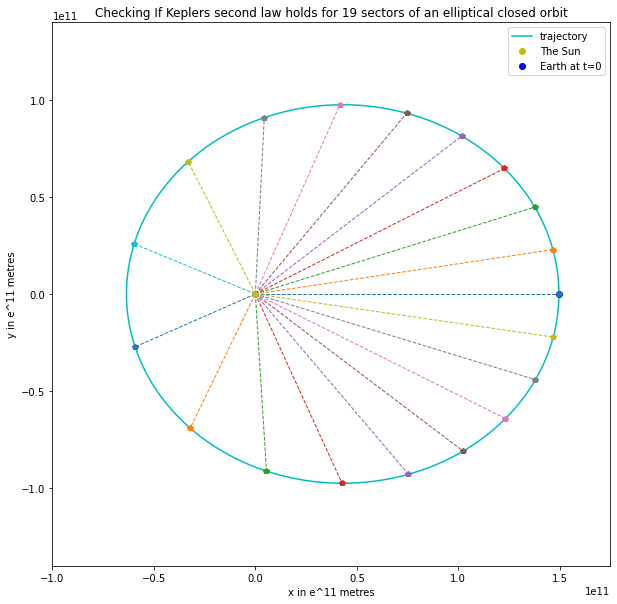

In [4]:
 #Our usual 'Earth + sun' simulation but now we add 'A' which is dA/dt evaluated alongside the VV-Algorithm
import numpy as np
import matplotlib.pyplot as plt
G=6.67408e-11
mass_sun=1.989e30
R=149.59787e9
tmax= 60*60*24*220
dt=1000
N = int(tmax/dt)   #N=19008

t = np.zeros((N,))
r = np.zeros((2,N))
v = np.zeros((2,N))
a = np.zeros((2,N))
A = np.zeros((N,))  #A is a scalar

r[0,0]=R
r[1,0]=0
v[0,0]=0
v[1,0]=23000    #This value of v0 gives us an elliptical orbit a[0,0]=-(G*mass_sun)/((R)**2)
a[1,0]=0


for n in range(0,N-1):
    t[n+1] = t[n] + dt
    r[:,n+1]=r[:,n] + ( v[:,n]*(dt)) + (0.5*(a[:,n])* ((dt)**2))
    a[:,n+1]=( (-1*G*mass_sun) / (np.sqrt((r[0,n+1])**2+(r[1,n+1])**2)**3) * r[:,n+1])
    v[:,n+1]=v[:,n]+0.5*(a[:,n+1]+a[:,n])*(dt)
    A[n+1]=0.5*np.cross(r[:,n+1],v[:,n+1]) #   From before we are using A=0.5*(v x r)

plt.figure(figsize=(10,10))
plt.plot(r[0,:],r[1,:],'c',label='trajectory')
plt.plot(0,'yo',lw=2,label='The Sun')
plt.plot(R,0,'bo',lw=2,label='Earth at t=0')

for i in range(19):
    plt.plot([0,r[0,1000*i]],[0,r[1,1000*i]],'p--',lw=1) #Plotting lines from the sun to the sample points
plt.xlabel('x in e^11 metres')
plt.ylabel('y in e^11 metres')
plt.legend()
plt.title('Checking If Keplers second law holds for 19 sectors of an elliptical closed orbit') 
plt.xlim(-100e9,175e9) 
plt.ylim(-140e9,140e9)

plt.show()

In [5]:
 #Just to check that the time between each sampled point is equal even though they vary in distance around the orbit
for i in range(19): 
    interval=t[1000*(i+1)]-t[1000*i] 
    print(interval)
    
    tdays=t/86400

1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0


In [6]:
#From our sample, we can see that dA/dt is constant for 5 significant figures. 
#As expected their values vary if we dont set a significant limit due to our method using the VV-algorithm. 
import math

sample_Avals=[]

for i in range(1,20):
    dAdt=A[1000*i]
    round_it=round(dAdt, 5-int(math.floor(math.log10(abs(dAdt)))) - 1) #setting the values to 5s.f.

    dAdt="{:.4e}".format(round_it) #converting the values to exponential values to look nicer
    sample_Avals.append(dAdt)
    
#A list of a few of the sample points and their dA/dt values
for i in range(1,12):
    print('At approximately '+str(int(tdays[1000*i]))+' days, dA/dt='+str(sample_Avals[i]))

At approximately 11 days, dA/dt=1.7204e+15
At approximately 23 days, dA/dt=1.7204e+15
At approximately 34 days, dA/dt=1.7204e+15
At approximately 46 days, dA/dt=1.7204e+15
At approximately 57 days, dA/dt=1.7204e+15
At approximately 69 days, dA/dt=1.7204e+15
At approximately 81 days, dA/dt=1.7204e+15
At approximately 92 days, dA/dt=1.7204e+15
At approximately 104 days, dA/dt=1.7204e+15
At approximately 115 days, dA/dt=1.7204e+15
At approximately 127 days, dA/dt=1.7204e+15


## Q5
For this question we modelled how three stars would interact with each other and their subsequent trajectories. 
Since there is no analytical solution to this, there are no equations that need to be solved here and the trajectories are chaotic. 

We modelled these firstly with the stars having very similar masses then varied the mass of one of the stars to see how that would affect how they interacted with each other. 

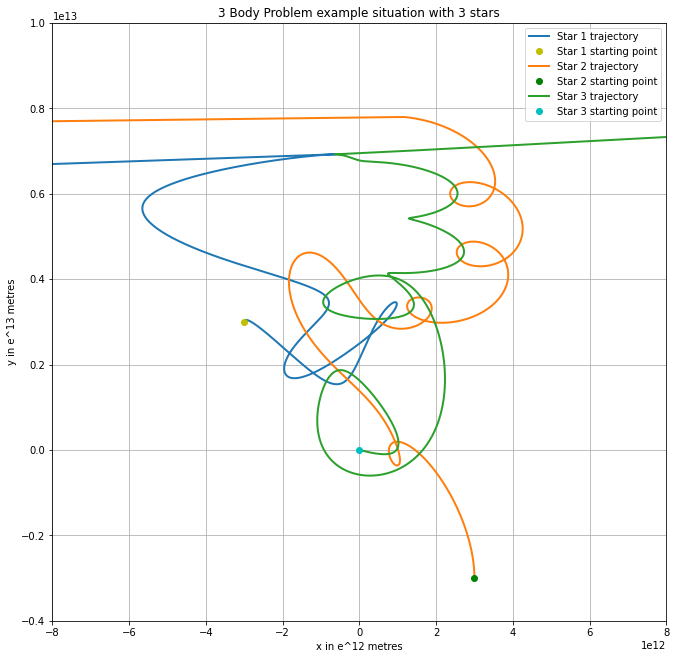

In [7]:
mstar1=3.15e30
mstar2=3.1e30
mstar3=3.4e30

import numpy as np
import matplotlib.pyplot as plt

G=6.67408e-11
D=1e12

tmax=8e9
dt=5e5
N = int(tmax/dt)
v0=1e3

t = np.zeros((N,))

r1 = np.zeros((2,N))
r2 = np.zeros((2,N))
r3 = np.zeros((2,N))

v1 = np.zeros((2,N))
v2 = np.zeros((2,N))
v3 = np.zeros((2,N))

a1 = np.zeros((2,N))
a2 = np.zeros((2,N))
a3 = np.zeros((2,N))

r1[:,0]=np.array([-3*D,3*D])
r2[:,0]=np.array([3*D,-3*D])
r3[:,0]=np.array([0,0])

v1[:,0]=np.array([0,v0])
v2[:,0]=np.array([0,5*v0])
v3[:,0]=np.array([0,0])


def NGL1(t):
    return G *(mstar2* (r2[:,t]-r1[:,t]) / (1e5+np.linalg.norm(r2[:,t]-r1[:
           ,t])**3) + mstar3* (r3[:,t]-r1[:,t]) / (1e5+np.linalg.norm(r3[:,t]-r1[:
           ,t])**3))

def NGL2(t):
    return G *(mstar1* (r1[:,t]-r2[:,t]) / (1e5+np.linalg.norm(r1[:,t]-r2[:
           ,t])**3) + mstar3* (r3[:,t]-r2[:,t]) / (1e5+np.linalg.norm(r3[:,t]-r2[:
           ,t])**3))

def NGL3(t):
    return G *(mstar1* (r1[:,t]-r3[:,t]) / (1e5+np.linalg.norm(r1[:,t]-r3[:
           ,t])**3) + mstar2* (r2[:,t]-r3[:,t]) / (1e5+np.linalg.norm(r2[:,t]-r3[:
           ,t])**3))


a1[:,0]=NGL1(0)
a2[:,0]=NGL2(0)
a3[:,0]=NGL3(0)

plt.figure(figsize=(11,11))
for n in range(0,N-1):
    t[n+1] = t[n] + dt
    r1[:,n+1]=r1[:,n] + ( v1[:,n]*(dt)) + (0.5*(a1[:,n])* ((dt)**2))
    r2[:,n+1]=r2[:,n] + ( v2[:,n]*(dt)) + (0.5*(a2[:,n])* ((dt)**2))
    r3[:,n+1]=r3[:,n] + ( v3[:,n]*(dt)) + (0.5*(a3[:,n])* ((dt)**2))
    a1[:,n+1]=NGL1(n+1)
    a2[:,n+1]=NGL2(n+1)
    a3[:,n+1]=NGL3(n+1)
    v1[:,n+1]=v1[:,n]+0.5*(a1[:,n+1]+a1[:,n])*(dt)
    v2[:,n+1]=v2[:,n]+0.5*(a2[:,n+1]+a2[:,n])*(dt)
    v3[:,n+1]=v3[:,n]+0.5*(a3[:,n+1]+a3[:,n])*(dt)


plt.plot(r1[0,:],r1[1,:],lw=2,label='Star 1 trajectory')
plt.plot(r1[0,0],r1[1,0],'yo',lw=4,label='Star 1 starting point')
plt.plot(r2[0,:],r2[1,:],lw=2,label='Star 2 trajectory')
plt.plot(r2[0,0],r2[1,0],'go',lw=4,label='Star 2 starting point')
plt.plot(r3[0,:],r3[1,:],lw=2,label='Star 3 trajectory')
plt.plot(r3[0,0],r3[1,0],'co',lw=4,label='Star 3 starting point')

plt.xlabel('x in e^12 metres')
plt.ylabel('y in e^13 metres')
plt.legend()
plt.title('3 Body Problem example situation with 3 stars')
plt.xlim(-8e12,8e12)
plt.ylim(-4e12,10e12)
plt.grid(True)
plt.show()

The first plot is our simulation if we increase mass of star 1 by 3.1746031746031633 percent
The second plot is our simulation if we increase mass of star 1 by 6.349206349206355 percent 


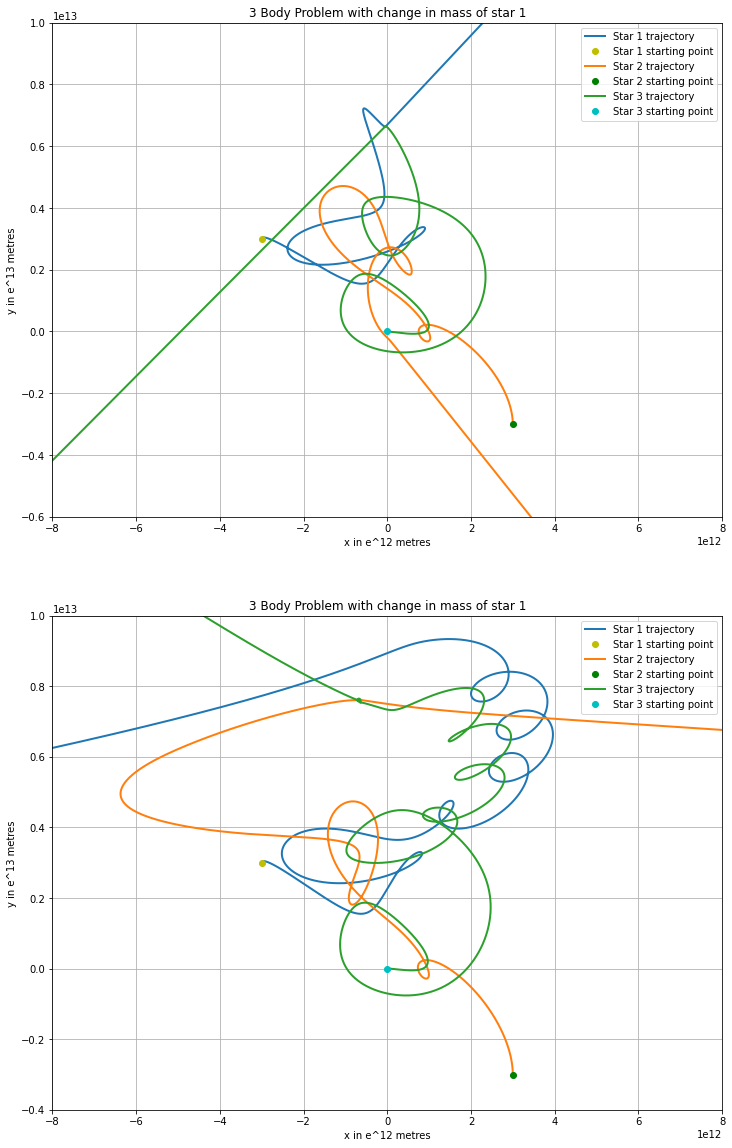

In [8]:
from matplotlib import cm

plt.figure(figsize=(12,20))

m_increase=(mstar1+1e29)/mstar1*100-100

mstar1=mstar1+1e29

t = np.zeros((N,))

r1 = np.zeros((2,N))
r2 = np.zeros((2,N))
r3 = np.zeros((2,N))

v1 = np.zeros((2,N))
v2 = np.zeros((2,N))
v3 = np.zeros((2,N))

a1 = np.zeros((2,N))
a2 = np.zeros((2,N))
a3 = np.zeros((2,N))

r1[:,0]=np.array([-3*D,3*D])
r2[:,0]=np.array([3*D,-3*D])
r3[:,0]=np.array([0,0])

v1[:,0]=np.array([0,v0])
v2[:,0]=np.array([0,5*v0])
v3[:,0]=np.array([0,0])

a1[:,0]=NGL1(0)
a2[:,0]=NGL2(0)
a3[:,0]=NGL3(0)

for n in range(0,N-1):
    
    t[n+1] = t[n] + dt
    r1[:,n+1]=r1[:,n] + ( v1[:,n]*(dt)) + (0.5*(a1[:,n])* ((dt)**2))
    r2[:,n+1]=r2[:,n] + ( v2[:,n]*(dt)) + (0.5*(a2[:,n])* ((dt)**2))
    r3[:,n+1]=r3[:,n] + ( v3[:,n]*(dt)) + (0.5*(a3[:,n])* ((dt)**2))
    a1[:,n+1]=NGL1(n+1)
    a2[:,n+1]=NGL2(n+1)
    a3[:,n+1]=NGL3(n+1)
    v1[:,n+1]=v1[:,n]+0.5*(a1[:,n+1]+a1[:,n])*(dt)
    v2[:,n+1]=v2[:,n]+0.5*(a2[:,n+1]+a2[:,n])*(dt)
    v3[:,n+1]=v3[:,n]+0.5*(a3[:,n+1]+a3[:,n])*(dt)
    
    
plt.subplot(211)
plt.plot(r1[0,:],r1[1,:],lw=2,label='Star 1 trajectory')
plt.plot(r1[0,0],r1[1,0],'yo',lw=4,label='Star 1 starting point')
plt.plot(r2[0,:],r2[1,:],lw=2,label='Star 2 trajectory')
plt.plot(r2[0,0],r2[1,0],'go',lw=4,label='Star 2 starting point')
plt.plot(r3[0,:],r3[1,:],lw=2,label='Star 3 trajectory')
plt.plot(r3[0,0],r3[1,0],'co',lw=4,label='Star 3 starting point')

plt.xlabel('x in e^12 metres')
plt.ylabel('y in e^13 metres')
plt.legend()
plt.title('3 Body Problem with change in mass of star 1')
plt.xlim(-8e12,8e12)
plt.ylim(-6e12,10e12)
plt.grid(True)

m_increase2=((3.15e30+2e29)/(3.15e30)) *100 - 100

mstar1=mstar1+1e29

print('The first plot is our simulation if we increase mass of star 1 by '+
str(m_increase) + ' percent')

print('The second plot is our simulation if we increase mass of star 1 by '+
str(m_increase2) + ' percent ')

t = np.zeros((N,))

r1 = np.zeros((2,N))
r2 = np.zeros((2,N))
r3 = np.zeros((2,N))

v1 = np.zeros((2,N))
v2 = np.zeros((2,N))
v3 = np.zeros((2,N))

a1 = np.zeros((2,N))
a2 = np.zeros((2,N))
a3 = np.zeros((2,N))

r1[:,0]=np.array([-3*D,3*D])
r2[:,0]=np.array([3*D,-3*D])
r3[:,0]=np.array([0,0])

v1[:,0]=np.array([0,v0])
v2[:,0]=np.array([0,5*v0])
v3[:,0]=np.array([0,0])

a1[:,0]=NGL1(0)
a2[:,0]=NGL2(0)
a3[:,0]=NGL3(0)

for n in range(0,N-1):
    t[n+1] = t[n] + dt
    r1[:,n+1]=r1[:,n] + ( v1[:,n]*(dt)) + (0.5*(a1[:,n])* ((dt)**2))
    r2[:,n+1]=r2[:,n] + ( v2[:,n]*(dt)) + (0.5*(a2[:,n])* ((dt)**2))
    r3[:,n+1]=r3[:,n] + ( v3[:,n]*(dt)) + (0.5*(a3[:,n])* ((dt)**2))
    a1[:,n+1]=NGL1(n+1)
    a2[:,n+1]=NGL2(n+1)
    a3[:,n+1]=NGL3(n+1)
    v1[:,n+1]=v1[:,n]+0.5*(a1[:,n+1]+a1[:,n])*(dt)
    v2[:,n+1]=v2[:,n]+0.5*(a2[:,n+1]+a2[:,n])*(dt)
    v3[:,n+1]=v3[:,n]+0.5*(a3[:,n+1]+a3[:,n])*(dt)
    
    
plt.subplot(212)
plt.plot(r1[0,:],r1[1,:],lw=2,label='Star 1 trajectory')
plt.plot(r1[0,0],r1[1,0],'yo',lw=4,label='Star 1 starting point')
plt.plot(r2[0,:],r2[1,:],lw=2,label='Star 2 trajectory')
plt.plot(r2[0,0],r2[1,0],'go',lw=4,label='Star 2 starting point')
plt.plot(r3[0,:],r3[1,:],lw=2,label='Star 3 trajectory')
plt.plot(r3[0,0],r3[1,0],'co',lw=4,label='Star 3 starting point')

plt.xlabel('x in e^12 metres')
plt.ylabel('y in e^13 metres')
plt.legend()
plt.title('3 Body Problem with change in mass of star 1')
plt.xlim(-8e12,8e12)
plt.ylim(-4e12,10e12)
plt.grid(True)
plt.show()

The first plot is our simulation if we increase mass of star 1 by 2.985074626865682 percent
The second plot is our simulation if we increase mass of star 1 by 6.349206349206355 percent 


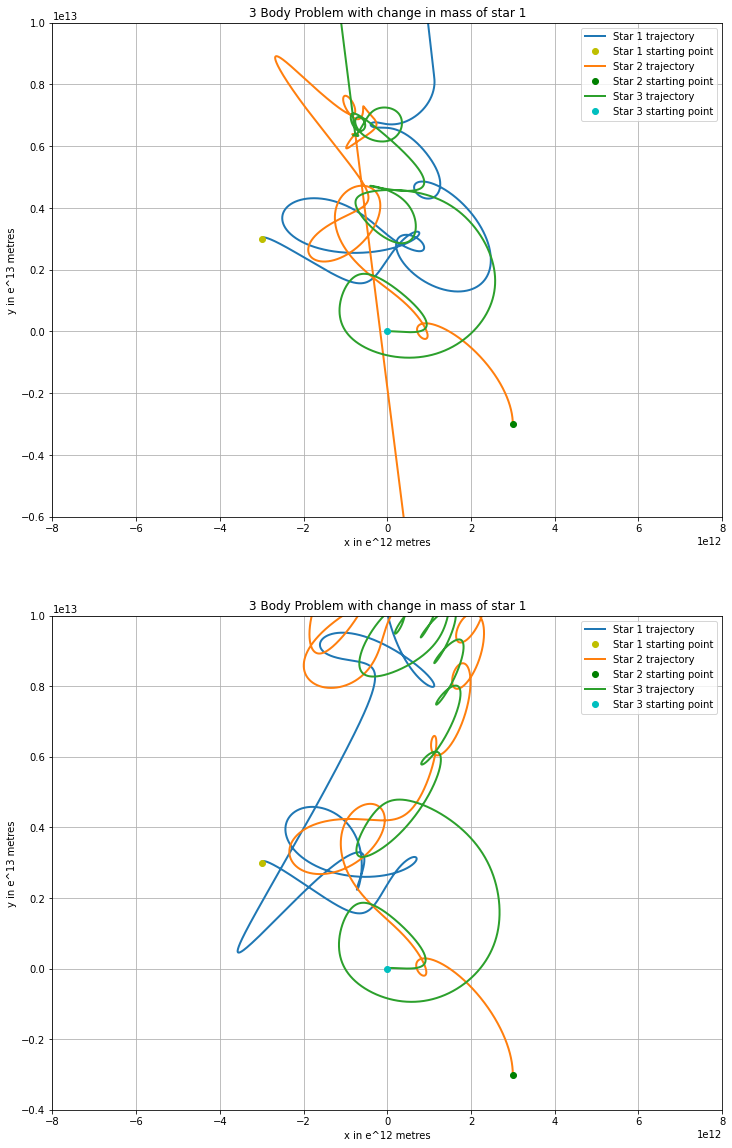

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:140: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


In [ ]:
from matplotlib import cm

plt.figure(figsize=(12,20))

m_increase=(mstar1+1e29)/mstar1*100-100

mstar1=mstar1+1e29

t = np.zeros((N,))

r1 = np.zeros((2,N))
r2 = np.zeros((2,N))
r3 = np.zeros((2,N))

v1 = np.zeros((2,N))
v2 = np.zeros((2,N))
v3 = np.zeros((2,N))

a1 = np.zeros((2,N))
a2 = np.zeros((2,N))
a3 = np.zeros((2,N))

r1[:,0]=np.array([-3*D,3*D])
r2[:,0]=np.array([3*D,-3*D])
r3[:,0]=np.array([0,0])

v1[:,0]=np.array([0,v0])
v2[:,0]=np.array([0,5*v0])
v3[:,0]=np.array([0,0])

a1[:,0]=NGL1(0)
a2[:,0]=NGL2(0)
a3[:,0]=NGL3(0)

for n in range(0,N-1):
    
    t[n+1] = t[n] + dt
    r1[:,n+1]=r1[:,n] + ( v1[:,n]*(dt)) + (0.5*(a1[:,n])* ((dt)**2))
    r2[:,n+1]=r2[:,n] + ( v2[:,n]*(dt)) + (0.5*(a2[:,n])* ((dt)**2))
    r3[:,n+1]=r3[:,n] + ( v3[:,n]*(dt)) + (0.5*(a3[:,n])* ((dt)**2))
    a1[:,n+1]=NGL1(n+1)
    a2[:,n+1]=NGL2(n+1)
    a3[:,n+1]=NGL3(n+1)
    v1[:,n+1]=v1[:,n]+0.5*(a1[:,n+1]+a1[:,n])*(dt)
    v2[:,n+1]=v2[:,n]+0.5*(a2[:,n+1]+a2[:,n])*(dt)
    v3[:,n+1]=v3[:,n]+0.5*(a3[:,n+1]+a3[:,n])*(dt)
    
    
plt.subplot(211)
plt.plot(r1[0,:],r1[1,:],lw=2,label='Star 1 trajectory')
plt.plot(r1[0,0],r1[1,0],'yo',lw=4,label='Star 1 starting point')
plt.plot(r2[0,:],r2[1,:],lw=2,label='Star 2 trajectory')
plt.plot(r2[0,0],r2[1,0],'go',lw=4,label='Star 2 starting point')
plt.plot(r3[0,:],r3[1,:],lw=2,label='Star 3 trajectory')
plt.plot(r3[0,0],r3[1,0],'co',lw=4,label='Star 3 starting point')

plt.xlabel('x in e^12 metres')
plt.ylabel('y in e^13 metres')
plt.legend()
plt.title('3 Body Problem with change in mass of star 1')
plt.xlim(-8e12,8e12)
plt.ylim(-6e12,10e12)
plt.grid(True)

m_increase2=((3.15e30+2e29)/(3.15e30)) *100 - 100

mstar1=mstar1+1e29

print('The first plot is our simulation if we increase mass of star 1 by '+ str(m_increase) + ' percent')

print('The second plot is our simulation if we increase mass of star 1 by '+ str(m_increase2) + ' percent ')

t = np.zeros((N,))

r1 = np.zeros((2,N))
r2 = np.zeros((2,N))
r3 = np.zeros((2,N))

v1 = np.zeros((2,N))
v2 = np.zeros((2,N))
v3 = np.zeros((2,N))

a1 = np.zeros((2,N))
a2 = np.zeros((2,N))
a3 = np.zeros((2,N))

r1[:,0]=np.array([-3*D,3*D])
r2[:,0]=np.array([3*D,-3*D])
r3[:,0]=np.array([0,0])

v1[:,0]=np.array([0,v0])
v2[:,0]=np.array([0,5*v0])
v3[:,0]=np.array([0,0])

a1[:,0]=NGL1(0)
a2[:,0]=NGL2(0)
a3[:,0]=NGL3(0)

for n in range(0,N-1):
    t[n+1] = t[n] + dt
    r1[:,n+1]=r1[:,n] + ( v1[:,n]*(dt)) + (0.5*(a1[:,n])* ((dt)**2))
    r2[:,n+1]=r2[:,n] + ( v2[:,n]*(dt)) + (0.5*(a2[:,n])* ((dt)**2))
    r3[:,n+1]=r3[:,n] + ( v3[:,n]*(dt)) + (0.5*(a3[:,n])* ((dt)**2))
    a1[:,n+1]=NGL1(n+1)
    a2[:,n+1]=NGL2(n+1)
    a3[:,n+1]=NGL3(n+1)
    v1[:,n+1]=v1[:,n]+0.5*(a1[:,n+1]+a1[:,n])*(dt)
    v2[:,n+1]=v2[:,n]+0.5*(a2[:,n+1]+a2[:,n])*(dt)
    v3[:,n+1]=v3[:,n]+0.5*(a3[:,n+1]+a3[:,n])*(dt)
    
    
plt.subplot(212)
plt.plot(r1[0,:],r1[1,:],lw=2,label='Star 1 trajectory')
plt.plot(r1[0,0],r1[1,0],'yo',lw=4,label='Star 1 starting point')
plt.plot(r2[0,:],r2[1,:],lw=2,label='Star 2 trajectory')
plt.plot(r2[0,0],r2[1,0],'go',lw=4,label='Star 2 starting point')
plt.plot(r3[0,:],r3[1,:],lw=2,label='Star 3 trajectory')
plt.plot(r3[0,0],r3[1,0],'co',lw=4,label='Star 3 starting point')

plt.xlabel('x in e^12 metres')
plt.ylabel('y in e^13 metres')
plt.legend()
plt.title('3 Body Problem with change in mass of star 1')
plt.xlim(-8e12,8e12)
plt.ylim(-4e12,10e12)
plt.grid(True)
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


tmax=1e8
dt=1e5
N = int(tmax/dt)

fig = plt.figure(figsize=(16,14))
ax = fig.gca(projection='3d')

xvec = np.arange(-6e12, 6e12, 1e7)
yvec = np.arange(-6e12, 6e12, 1e7)
xmat, ymat = np.meshgrid(xvec, yvec)


mstar1=3e30
mstar2=3e30
mstar3=4e30

t = np.zeros((N,))

r1 = np.zeros((3,N))
r2 = np.zeros((3,N))
r3 = np.zeros((3,N))

v1 = np.zeros((3,N))
v2 = np.zeros((3,N))
v3 = np.zeros((3,N))

a1 = np.zeros((3,N))
a2 = np.zeros((3,N))
a3 = np.zeros((3,N))

r1[:,0]=np.array([-3*D,3*D,-3*D])
r2[:,0]=np.array([3*D,-3*D,3*D])
r3[:,0]=np.array([0,0,0])

v1[:,0]=np.array([0,0,0])
v2[:,0]=np.array([0,0,0])
v3[:,0]=np.array([0,0,0])

a1[:,0]=NGL1(0)
a2[:,0]=NGL2(0)
a3[:,0]=NGL3(0)

for n in range(0,N-1):
    t[n+1] = t[n] + dt
    r1[:,n+1]=r1[:,n] + ( v1[:,n]*(dt)) + (0.5*(a1[:,n])* ((dt)**2))
    r2[:,n+1]=r2[:,n] + ( v2[:,n]*(dt)) + (0.5*(a2[:,n])* ((dt)**2))
    r3[:,n+1]=r3[:,n] + ( v3[:,n]*(dt)) + (0.5*(a3[:,n])* ((dt)**2))
    a1[:,n+1]=NGL1(n+1)
    a2[:,n+1]=NGL2(n+1)
    a3[:,n+1]=NGL3(n+1)
    v1[:,n+1]=v1[:,n]+0.5*(a1[:,n+1]+a1[:,n])*(dt)
    v2[:,n+1]=v2[:,n]+0.5*(a2[:,n+1]+a2[:,n])*(dt)
    v3[:,n+1]=v3[:,n]+0.5*(a3[:,n+1]+a3[:,n])*(dt)
    
star1_plot = ax.plot(r1[0,:],r1[1,:],r1[2,:],linewidth=3)
star2_plot = ax.plot(r2[0,:],r2[1,:],r2[2,:],linewidth=3)
star3_plot = ax.plot(r3[0,:],r3[1,:],r3[2,:],linewidth=3)

ax.set_xlim(-8e12, 8e12)
ax.set_ylim(-8e12, 8e12)
ax.set_zlim(-8e12, 8e12)
plt.show()